# Fondamenti di Analisi Dati - Spambase
## Rosario Scavo (1000037803)

Data can be downloaded from here
http://archive.ics.uci.edu/dataset/94/spambase

## Index:
* [Dataset description](#data-description)
  * [Attribute description](#attribute-description)
* [Dataset Analysis](#data-analysis)
  * [Dataset integrity](#data-integrity)
  * [Descriptive statistics](#descriptive-statistics)
  

# Dataset description <a id="data-description"></a>

The dataset includes various types of content that fall under the category of "spam", such as advertisements, chain letters, make-money-fast schemes, and pornography. The spam emails were collected from individuals who reported spam and the postmaster. On the other hand, non-spam emails were collected from personal and work files, where the presence of the word 'george' and the area code '650' were used as indicators of non-spam.

The central goal is to establish a classification rule to identify spam messages based on the frequency of specific words, numbers, characters, or consecutive capital letters in phrases. We will utilize various classification algorithms, including logistic regression (LR), Decision-Tree, and K-nearest neighbors algorithm (KNN), K-Means, to achieve this. These algorithms will be optimized through appropriate data preparation, transformation, and hyperparameter tuning using built-in Python functions. Additionally, we will determine the appropriate metrics to maximize and their impact on classification performance.

However, effective implementation requires thorough data analysis. Without prior data understanding, employing classifiers becomes challenging, if not impossible. This analysis will involve attribute exploration, variable type verification, missing value identification, feature-level metric analysis (mean, standard deviation, quantiles, etc.), feature importance determination for spam/non-spam classification, and outlier detection and analysis.

In [1]:
#imports
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
names_list_filepath = 'spambase/names.txt'
attribute_names = []

with open(names_list_filepath, 'r') as file:
    attribute_names = file.read().splitlines()
    
data=pd.read_csv('spambase/spambase.data', names = attribute_names)
data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


## Attribute description <a id="attribute-description"></a>
- The last column of 'spambase.data' (**Class**) indicates whether the email was considered spam (1) or not (0), i.e., unsolicited commercial email.
- Most attributes indicate whether a specific word or character frequently occurs in the email.
- Attributes 55-57 (*run-length* attributes) measure the length of sequences of consecutive capital letters.

### Definitions of Attributes:
1. **48 continuous real [0,100] attributes of type `word_freq_WORD`:**
   - Percentage of words in the email that match the specified word. 
   - Calculation: $\frac{100 \times (\text{Number of times the word appears in the email})}{\text{Total number of words in the email}}$


2. **6 continuous real [0,100] attributes of type `char_freq_CHAR`:**
   - Percentage of characters in the email that match the specified character.
   - Calculation: 100 * (number of occurrences of the character) / total characters in the email.

3. **1 continuous real [1,...] attribute of type `capital_run_length_average`:**
   - Average length of uninterrupted sequences of capital letters.

4. **1 continuous integer [1,...] attribute of type `capital_run_length_longest`:**
   - Length of the longest uninterrupted sequence of capital letters.

5. **1 continuous integer [1,...] attribute of type `capital_run_length_total`:**
   - Sum of the length of uninterrupted sequences of capital letters.
   - Total number of capital letters in the email.

6. **1 nominal {0,1} class attribute of type `spam`:**
   - Denotes whether the email was considered spam (1) or not (0), i.e., unsolicited commercial email.


In [3]:
data.keys()

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


- **Number of instances:** 4601, of which 1813 are SPAM (39.4%)
- **Number of attributes:** 58 (57 continuous, 1 categorical representing the class label).

In [4]:
class_counts = data['Class'].value_counts()
print(class_counts)
print("\n")
data.info()

Class
0    2788
1    1813
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non

# Dataset analysis <a id="data-analysis"></a>

## Dataset integrity <a id="data-integrity"></a>

Before analyzing the data, let's verify that the 'Class' attribute only contains the values 1 and 0. Additionally, we will check for any NaN values in the dataset.

In [5]:
data['Class'].unique()

array([1, 0])

In [6]:
count_nan_in_df = data.isnull().sum().sum()
print(f'Number of NaN values: {count_nan_in_df}')

Number of NaN values: 0


Using the min and max lines of the `describe` function, which allow us to calculate the minimum and maximum values for each column, we can verify that indeed **the values of attributes indicating frequencies fall within the established ranges**. Specifically, the lower limit of the range is respected, while the upper limit is higher by one because the frequencies have been multiplied by 100 (percentage), as described previously.

**Issue: Matrix Sparsity** However, we observe that the quartile values are all zero. This is due to the sparsity of the matrix, where many frequency-related values are zero in most records. As a result, the data is concentrated near zero, introducing noise that could compromise the statistical analysis of the dataset. Hence, later in the project, I decided to replace values equal to 0.0 with NaN for attributes indicating frequencies in order to eliminate them.

In [7]:
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


For simplicity, we will change the class type to bool and rename it to 'spam.' Consequently, when a record has `spam=True`, it indicates that the email is spam.

In [8]:
data['spam'] = data['Class'].astype(bool)
data = data.drop(columns=['Class'])
data['spam']

0        True
1        True
2        True
3        True
4        True
        ...  
4596    False
4597    False
4598    False
4599    False
4600    False
Name: spam, Length: 4601, dtype: bool

## Descriptive statistics <a id="descriptive statistics"></a>

Emails can be categorized into two groups: spam and non-spam. To better understand these categories, it is important to calculate fundamental statistics for each group. Furthermore, we aim to pinpoint specific characteristics that could significantly influence the classification of an email.

In [9]:
spam = data[data['spam'] == True]
non_spam = data[data['spam'] == False]

In [10]:
spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,...,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000
mean,0.152339,0.164650,0.403795,0.164672,0.513955,0.174876,0.275405,0.208141,0.170061,0.350507,...,0.002101,0.020573,0.108970,0.008199,0.513713,0.174478,0.078877,9.519165,104.393271,470.619415
std,0.310645,0.348919,0.480725,2.219087,0.707195,0.321927,0.572110,0.544864,0.354804,0.631384,...,0.026821,0.091621,0.282141,0.047449,0.744183,0.360479,0.611941,49.846186,299.284969,825.081179
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.094000,0.000000,0.000000,2.324000,15.000000,93.000000
50%,0.000000,0.000000,0.300000,0.000000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.331000,0.080000,0.000000,3.621000,38.000000,194.000000
75%,0.170000,0.210000,0.640000,0.000000,0.780000,0.240000,0.340000,0.190000,0.190000,0.510000,...,0.000000,0.000000,0.144000,0.000000,0.645000,0.211000,0.018000,5.708000,84.000000,530.000000
max,4.540000,4.760000,3.700000,42.810000,7.690000,2.540000,7.270000,11.110000,3.330000,7.550000,...,0.770000,1.117000,9.752000,1.171000,7.843000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


In [11]:
non_spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,...,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000
mean,0.073479,0.244466,0.200581,0.000886,0.181040,0.044544,0.009383,0.038415,0.038049,0.167170,...,0.051227,0.050281,0.158578,0.022684,0.109984,0.011648,0.021713,2.377301,18.214491,161.470947
std,0.297838,1.633223,0.502959,0.021334,0.614521,0.222888,0.110467,0.247238,0.198517,0.643197,...,0.365153,0.303372,0.260604,0.134927,0.820859,0.069647,0.243912,5.113685,39.084792,355.738403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.384000,4.000000,18.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.064500,0.000000,0.000000,0.000000,0.000000,1.857000,10.000000,54.000000
75%,0.000000,0.000000,0.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.222000,0.000000,0.027000,0.000000,0.000000,2.555000,18.000000,141.000000
max,4.340000,14.280000,5.100000,0.870000,10.000000,5.880000,3.070000,5.880000,5.260000,18.180000,...,10.000000,4.385000,5.277000,4.081000,32.478000,2.038000,7.407000,251.000000,1488.000000,5902.000000


### Histograms distribution <a id="histograms-distribution"></a>

Histograms visually represent the distribution of values within each feature, providing valuable insights into the patterns and tendencies associated with spam and non-spam emails. By scrutinizing these histograms, one can discern any differences in the distributions, thereby gaining valuable insights into the characteristic features that distinguish spam from legitimate messages. For instance, when comparing `word_freq_business` with `word_freq_3d`, it is clear that the latter is a good feature for discriminating between spam and nonspam.

In [12]:
def plot_histogram(feature, spam, non_spam):
    plt.hist(spam[feature], bins=20, alpha=0.5, label='Spam')
    plt.hist(non_spam[feature], bins=20, alpha=0.5, label='Non-Spam')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature} for Spam and Non-Spam Emails')
    plt.legend()
    plt.show()

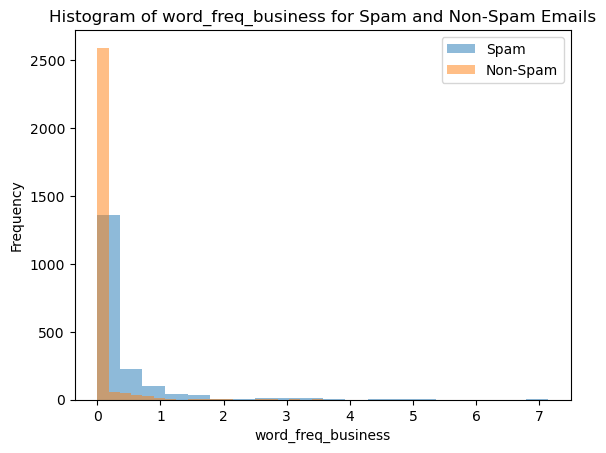

In [13]:
plot_histogram('word_freq_business', spam, non_spam)

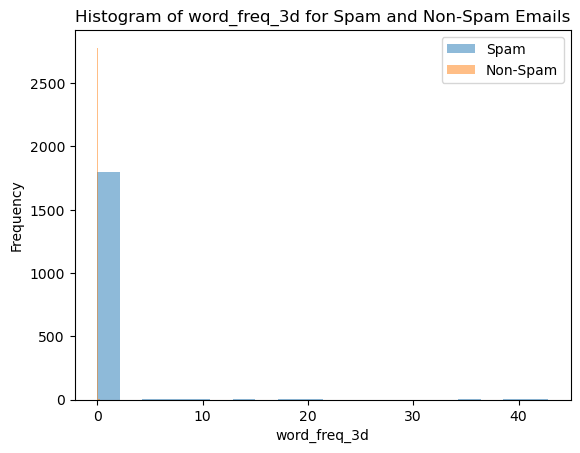

In [14]:
plot_histogram('word_freq_3d', spam, non_spam)

### Feature ratios <a id="feature-ratios"></a>

Certain columns showcase markedly higher maximum values within one class, juxtaposed with relatively lower values in the counterpart class. These observations provide valuable insights into potential discriminative features crucial for email classification.

In order to identify influential features impacting email classification, we scrutinize the features by averaging the values within the Spambase dataset and assessing the ratios between spam and non-spam emails. We show only the features greater than the average of the ratio.

In [15]:
spam_mean = spam.mean()
non_spam_mean = non_spam.mean()
spam_diff = pd.concat([spam_mean, non_spam_mean, spam_mean/non_spam_mean], axis=1)
#remove last row (spam column)
spam_diff = spam_diff[:-1]
spam_diff.columns = ['Spam', 'Non-Spam', 'Ratio']

In [16]:
spam_diff_mean = spam_diff['Ratio'].mean()
selected_spam_diff = spam_diff[spam_diff['Ratio'] > spam_diff_mean]
selected_spam_diff

,Spam,Non-Spam,Ratio
word_freq_3d,0.164672,0.000886,185.872477
word_freq_remove,0.275405,0.009383,29.351310
word_freq_addresses,0.112079,0.008318,13.474663
word_freq_credit,0.205521,0.007579,27.117520
word_freq_000,0.247055,0.007088,34.857704
word_freq_money,0.212879,0.017138,12.421667
char_freq_$,0.174478,0.011648,14.978608


We can plot the distribution of the ratios to have a better idea.

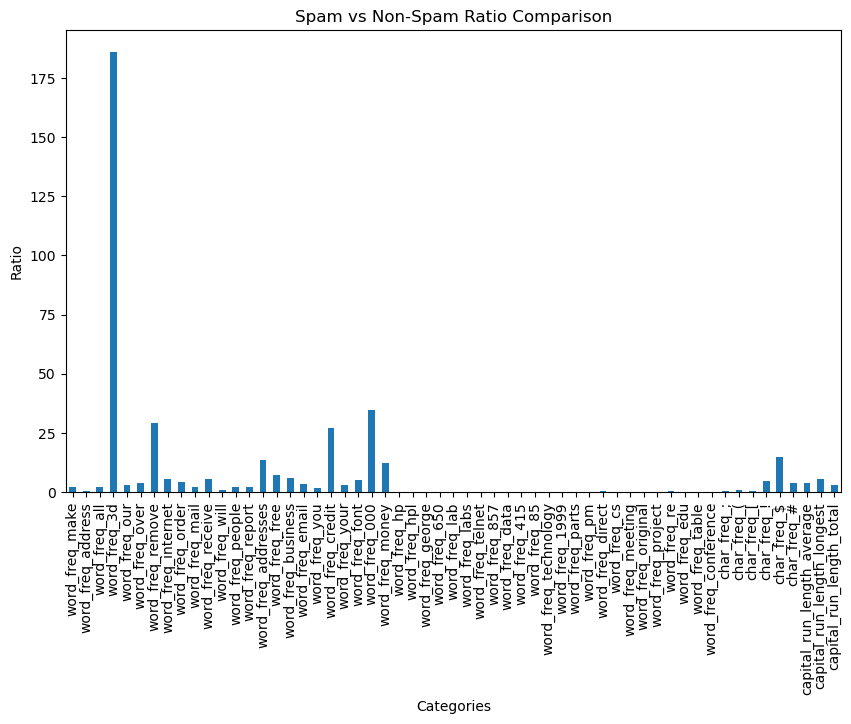

In [17]:
import matplotlib.pyplot as plt

# Assuming spam_diff is already defined

# Plotting a bar chart
spam_diff['Ratio'].plot(kind='bar', figsize=(10, 6))

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Ratio')
plt.title('Spam vs Non-Spam Ratio Comparison')

# Displaying the plot
plt.show()

In [36]:
spam_indicators = list(selected_spam_diff.index.values)
spam_indicators.append('spam')
spam_indicators

['word_freq_3d',
 'word_freq_remove',
 'word_freq_addresses',
 'word_freq_credit',
 'word_freq_000',
 'word_freq_money',
 'char_freq_$',
 'spam']

Upon closer examination of certain word pairs, a discernible trend emerges: the joint appearance of both words in an email often suggests a higher likelihood of it being classified as spam. Furthermore, there is an intriguing correlation with word frequency, where a higher frequency is indicative of a higher likelihood of the email being categorized as spam.

/home/rosario/anaconda3/envs/fad/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rosario/anaconda3/envs/fad/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rosario/anaconda3/envs/fad/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rosario/anaconda3/envs/fad/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

Text(0.5, 1.01, 'SPAM indicators')

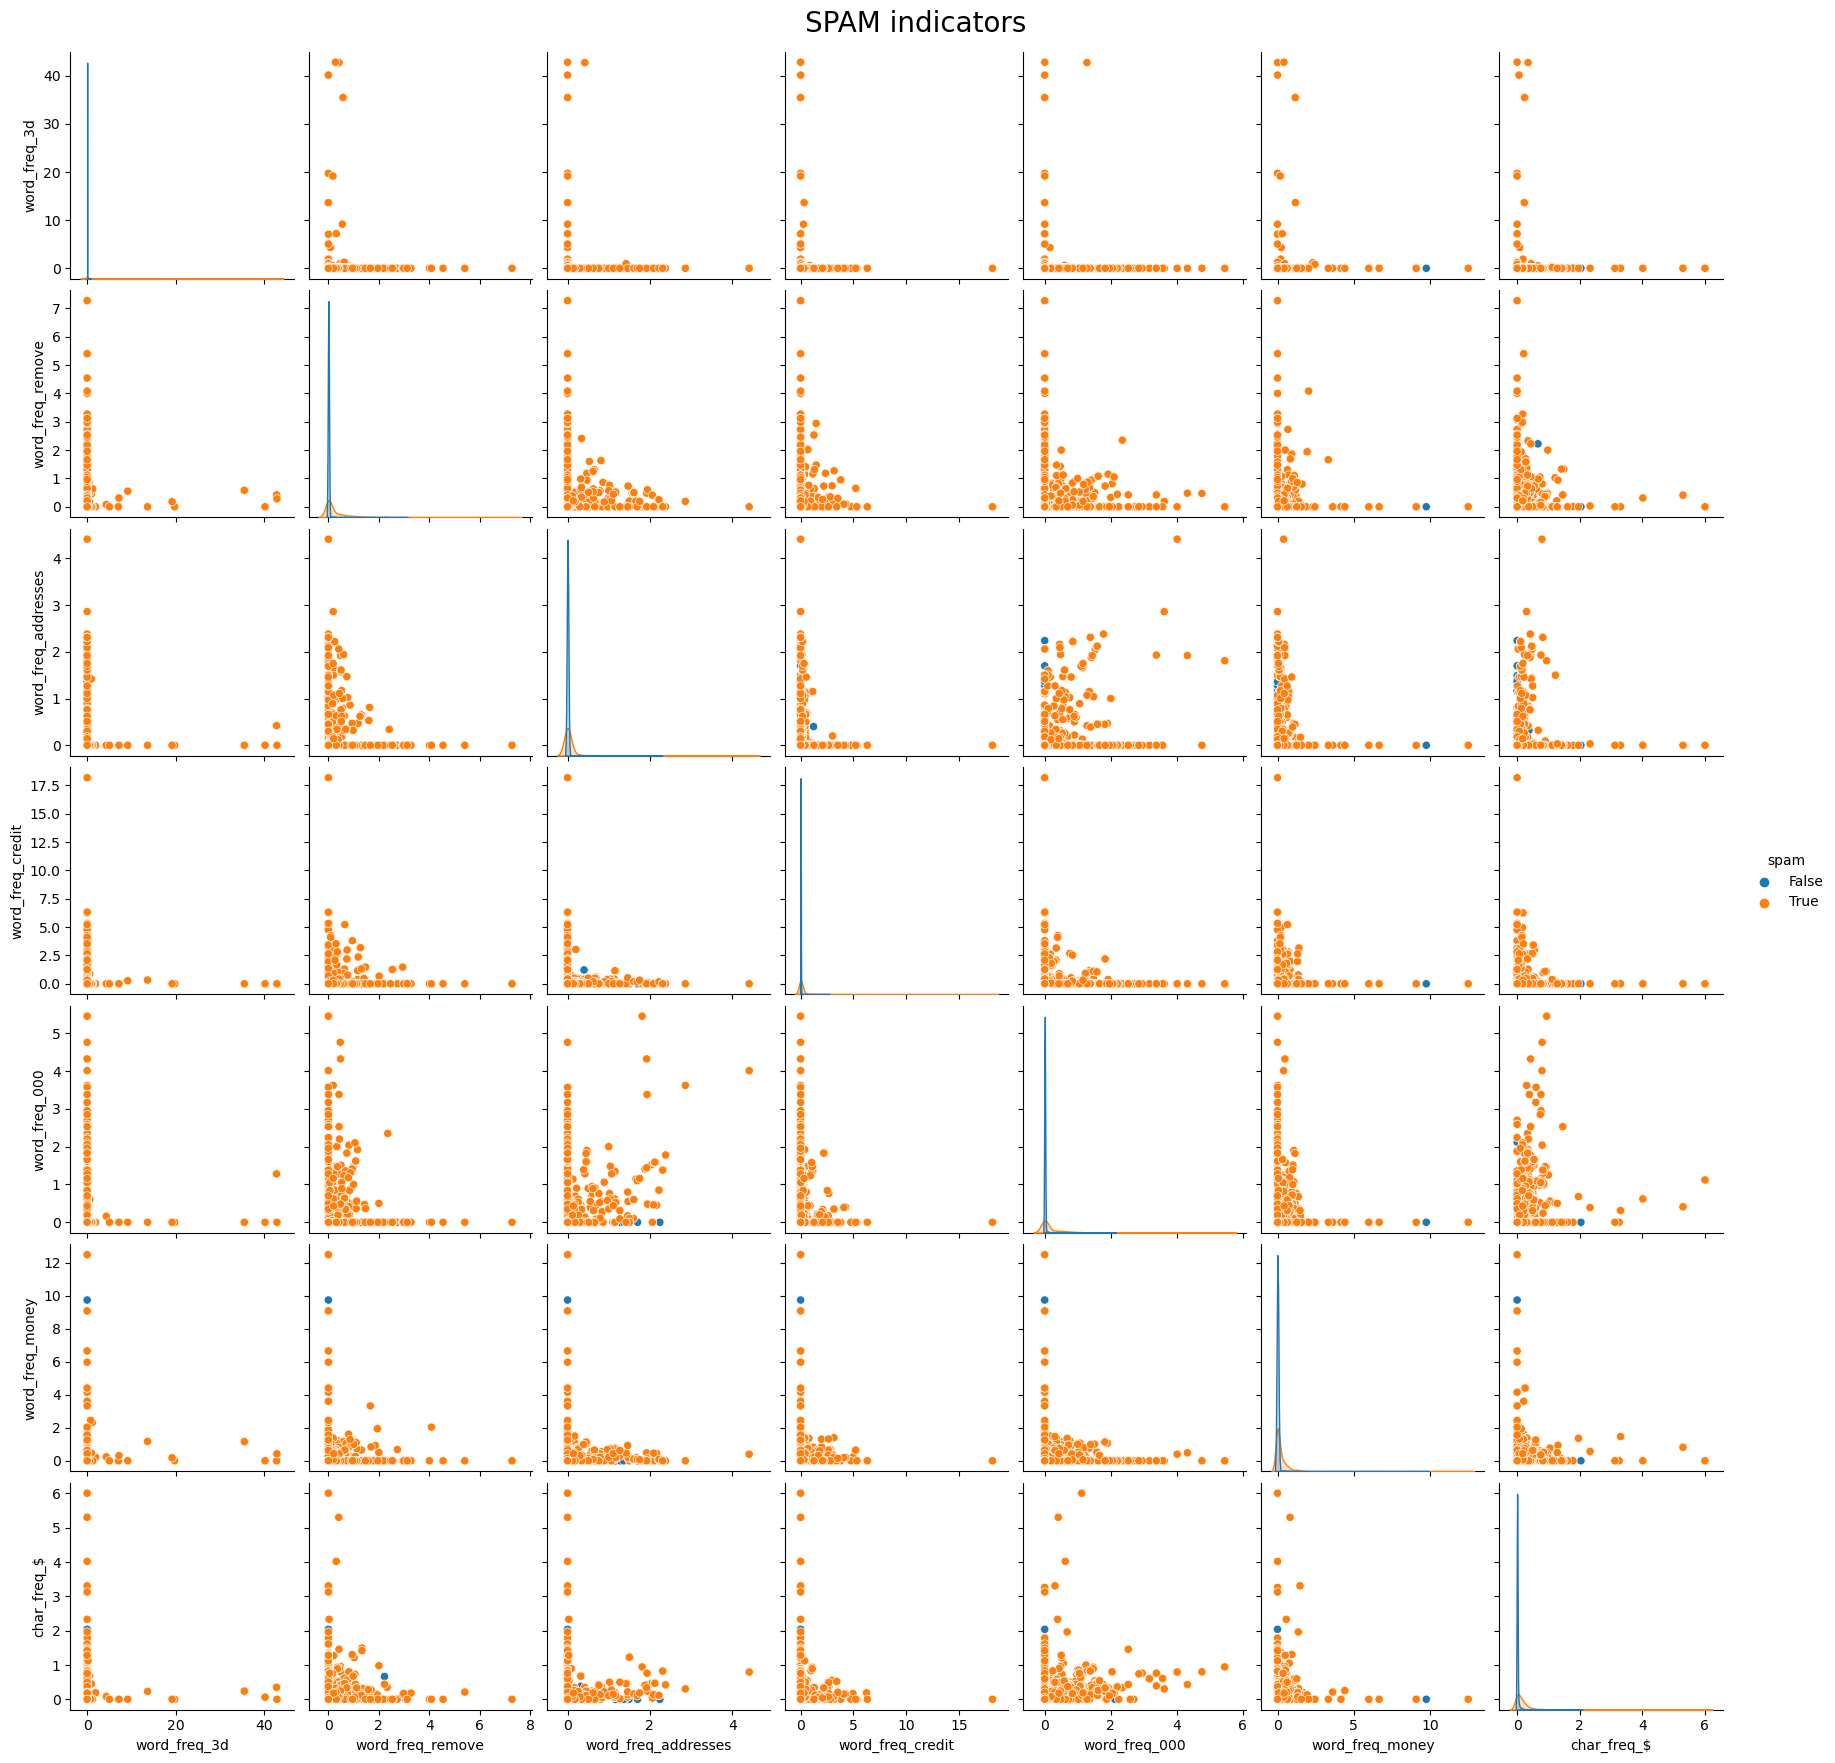

In [37]:
import seaborn as sns

pair_spam = sns.pairplot(data[spam_indicators].iloc[::-1], hue="spam")
pair_spam.fig.suptitle('SPAM indicators', y=1.01, fontsize=20)

## Hypothesis testing (chi2) <a id="hypothesis-testing"></a>

## Interpreting Chi-Square Test Results

The p-values obtained through the chi-square test (`chi2_contingency`) serve as crucial indicators in understanding the relationship between the examined feature (independent variable) and the target variable 'spam.' The null hypothesis, in this context, posits no association or difference between the feature and the likelihood of an email being classified as spam.

### Interpretation Guidelines:

- **Small p-value (e.g., < 0.05):**
  - **Conclusion:** Reject the null hypothesis.
  - **Implication:** Strong evidence exists, suggesting an association or difference between the feature and the 'spam' variable. The feature is likely to be statistically significant in predicting spam.

- **Large p-value (e.g., > 0.05):**
  - **Conclusion:** Fail to reject the null hypothesis.
  - **Implication:** Insufficient evidence to conclude an association or difference between the feature and the 'spam' variable. The feature may not be statistically significant in predicting spam.

A commonly used significance level (alpha) is 0.05. If a p-value is less than or equal to alpha, the null hypothesis is rejected. Careful consideration of these p-values allows the identification of features that play a significant role in predicting spam.


In [20]:
from scipy.stats import chi2_contingency

p_values = {}
for column in data.columns[:-1]:
    contingency_table = pd.crosstab(data[column], data['spam'])
    _, p_value, _, _ = chi2_contingency(contingency_table)
    p_values[column] = round(p_value, 5)

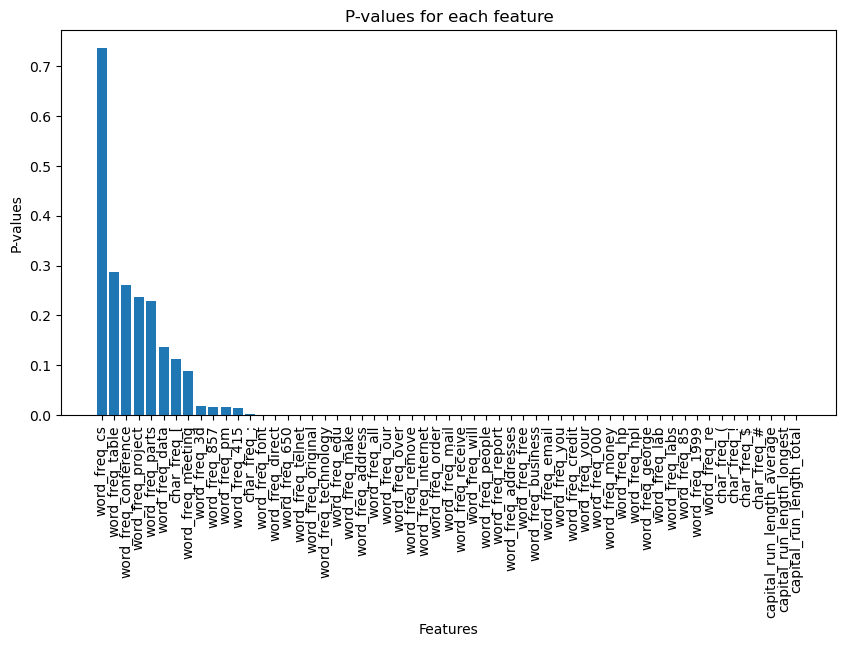

In [22]:
import matplotlib.pyplot as plt

sorted_p_values = dict(sorted(p_values.items(), key=lambda item: float(item[1]), reverse=True))
keys = sorted_p_values.keys()
values = [float(v) for v in sorted_p_values.values()]

plt.figure(figsize=(10,5))
plt.bar(keys, values)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('P-values')
plt.title('P-values for each feature')
plt.show()

In [41]:
p_value_threshold = 0.05
non_significant_indicators = {k: v for k, v in sorted_p_values.items() if v > p_value_threshold}
non_significant_indicators

{'word_freq_cs': 0.73532,
 'word_freq_table': 0.28752,
 'word_freq_conference': 0.25999,
 'word_freq_project': 0.23742,
 'word_freq_parts': 0.22839,
 'word_freq_data': 0.13572,
 'char_freq_[': 0.11276,
 'word_freq_meeting': 0.08921}

In [39]:
spam_indicators = spam_indicators[:-1]
spam_indicators

['word_freq_3d',
 'word_freq_remove',
 'word_freq_addresses',
 'word_freq_credit',
 'word_freq_000',
 'word_freq_money',
 'char_freq_$']